# Align Workshop 2- R and Linear Regression

## Introduction to R

### Basic Assignment

Just like in Python and other programming languages, R allows you to assign values to variables in the following notation. This allows us to store values for later use.

In [1]:
x <- 3
4 -> y

In [2]:
x

[1] 3

In [3]:
y

[1] 4

In [4]:
z -> 150.5

ERROR: Error in 150.5 <- z: invalid (do_set) left-hand side to assignment


In [5]:
new_var <- x + y + 3
new_var

[1] 10

In [6]:
#Play around in here with assignment

### Vectors

To store a collection of objects, R uses 'vectors'. The easiest way to create a vector is with the c() function that concatenates objects together.

In [7]:
c(3,4,5.6,8444)

[1]    3.0    4.0    5.6 8444.0

In [8]:
x<- c(3,4,5.6,8444)

In [9]:
x

[1]    3.0    4.0    5.6 8444.0

In [10]:
c()

NULL

In [11]:
x[1]

[1] 3

In [12]:
x[1:5]

[1]    3.0    4.0    5.6 8444.0     NA

In [13]:
x[5] <- 1

In [14]:
x

[1]    3.0    4.0    5.6 8444.0    1.0

In [15]:
x[8] <- 3

In [16]:
x

[1]    3.0    4.0    5.6 8444.0    1.0     NA     NA    3.0

In [17]:
x[0] <- 2

In [18]:
x

[1]    3.0    4.0    5.6 8444.0    1.0     NA     NA    3.0

In [19]:
z <-c(4,5)

In [20]:
z

[1] 4 5

In [21]:
y <- x + z

In [22]:
y

[1]    7.0    9.0    9.6 8449.0    5.0     NA     NA    8.0

In [23]:
mult <- y * 2

In [24]:
mult

[1]    14.0    18.0    19.2 16898.0    10.0      NA      NA    16.0

In [25]:
combine <- c(1,3, x, y, z)

In [26]:
combine

[1]    1.0    3.0    3.0    4.0    5.6 8444.0    1.0     NA     NA    3.0
[11]    7.0    9.0    9.6 8449.0    5.0     NA     NA    8.0    4.0    5.0

In [27]:
c(1, 2, 3, 4) + c(0, 10, 100)

Warning message in c(1, 2, 3, 4) + c(0, 10, 100):
“longer object length is not a multiple of shorter object length”

[1]   1  12 103   4

### Useful Functions in R

In [28]:
x <- c(1,2,3,4)

In [29]:
length(x)

[1] 4

In [30]:
mean(x)

[1] 2.5

In [31]:
var(x)

[1] 1.666667

## Linear Regression!

In [32]:
#Do NOT edit this box. Just hit shift-enter
galton <- read.csv(file="galton.csv",head=TRUE,sep=",")

In [110]:
options(repr.plot.width =4, repr.plot.height=4)

In [111]:
galton

,Family,Father,Mother,Gender,Height,Kids
1,1,78.5,67,M,73.2,4
2,1,78.5,67,F,69.2,4
3,1,78.5,67,F,69,4
4,1,78.5,67,F,69,4
5,2,75.5,66.5,M,73.5,4
6,2,75.5,66.5,M,72.5,4
7,2,75.5,66.5,F,65.5,4
8,2,75.5,66.5,F,65.5,4
9,3,75,64,M,71,2
10,3,75,64,F,68,2


In [112]:
summary(galton)

     Family        Father          Mother      Gender      Height     
 185    : 15   Min.   :62.00   Min.   :58.00   F:433   Min.   :56.00  
 166    : 11   1st Qu.:68.00   1st Qu.:63.00   M:465   1st Qu.:64.00  
 66     : 11   Median :69.00   Median :64.00           Median :66.50  
 130    : 10   Mean   :69.23   Mean   :64.08           Mean   :66.76  
 136    : 10   3rd Qu.:71.00   3rd Qu.:65.50           3rd Qu.:69.70  
 140    : 10   Max.   :78.50   Max.   :70.50           Max.   :79.00  
 (Other):831                                                          
      Kids       
 Min.   : 1.000  
 1st Qu.: 4.000  
 Median : 6.000  
 Mean   : 6.136  
 3rd Qu.: 8.000  
 Max.   :15.000  
                 

Let us calculate the linear regression for this data set! We will relate the Mother's height ('Mother' in the table) to the child's height ('Height' in the table). But how do we access the data just in these columns?

In [113]:
summary(galton$Mother)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  58.00   63.00   64.00   64.08   65.50   70.50 

R uses the '$' syntax to access a specific column's data from the data set.

In [114]:
M_heights <- galton$Mother
C_heights <- galton$Height

In [115]:
lm(Height ~ Mother, galton)


Call:
lm(formula = Height ~ Mother, data = galton)

Coefficients:
(Intercept)       Mother  
    46.6908       0.3132  


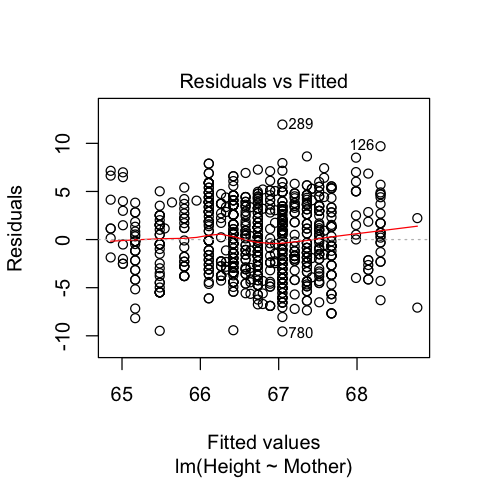

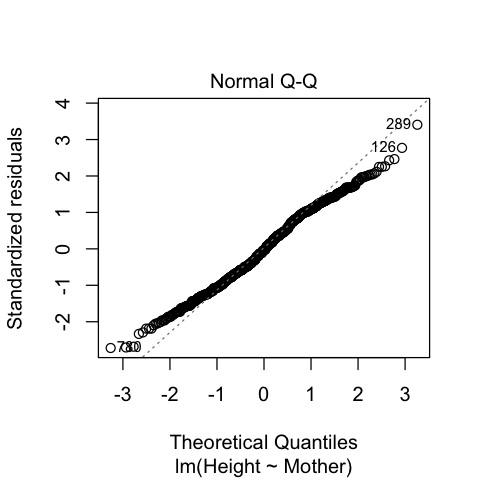

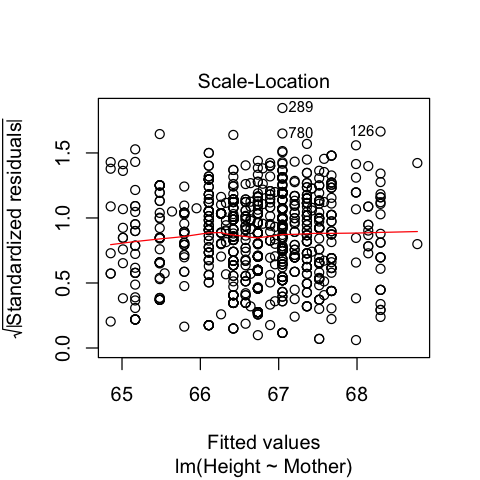

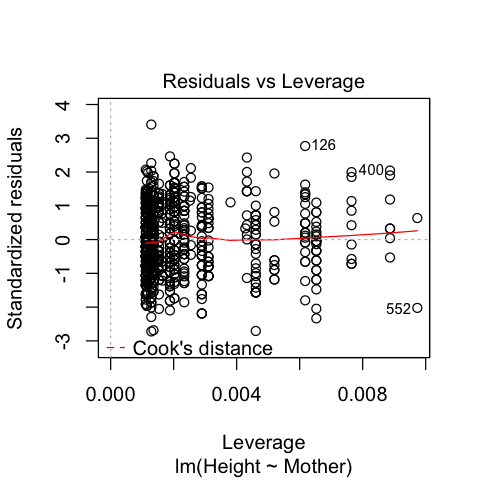

In [116]:
plot(lm(Height~ Mother,galton))

In [117]:
cor(galton$Mother, M_heights)

[1] 1

In [118]:
t2 <- read.table(file="LCB_tsppi.txt",head=TRUE)

In [119]:
summary(t2)

    ProteinA        ProteinB       Adipocyte      AdrenalCortex   
 P62993 :  469   P0CG48 :  357   Min.   :0.0000   Min.   :0.0000  
 Q9H0R8 :  448   P78352 :  265   1st Qu.:0.0000   1st Qu.:0.0000  
 P60520 :  447   P62993 :  259   Median :1.0000   Median :1.0000  
 O95166 :  421   Q13547 :  202   Mean   :0.5123   Mean   :0.5545  
 P63104 :  331   P04637 :  184   3rd Qu.:1.0000   3rd Qu.:1.0000  
 P01106 :  327   Q9Y4K3 :  182   Max.   :1.0000   Max.   :1.0000  
 (Other):61907   (Other):62901                                    
  Adrenalgland       Amygdala         Appendix      AtrioventricularNode
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000      
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000      
 Median :0.0000   Median :1.0000   Median :1.0000   Median :0.0000      
 Mean   :0.4653   Mean   :0.5574   Mean   :0.5634   Mean   :0.4371      
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000      
 Max.   :1.0000   Max.   :

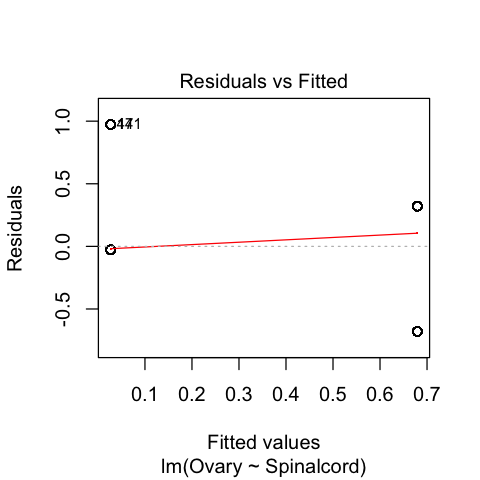

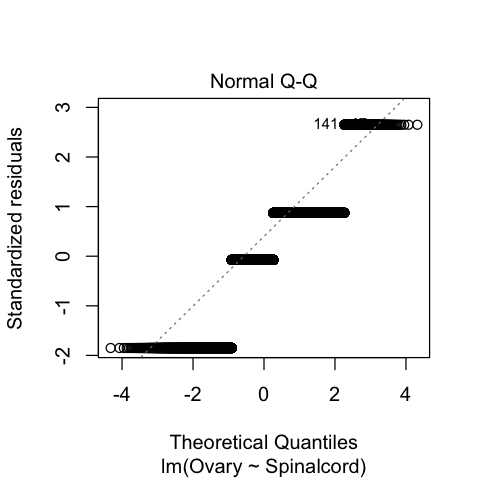

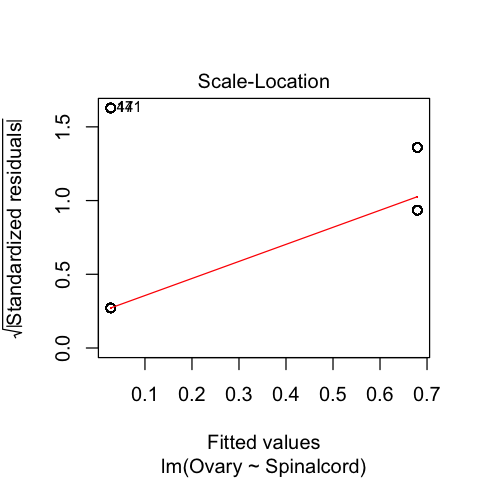

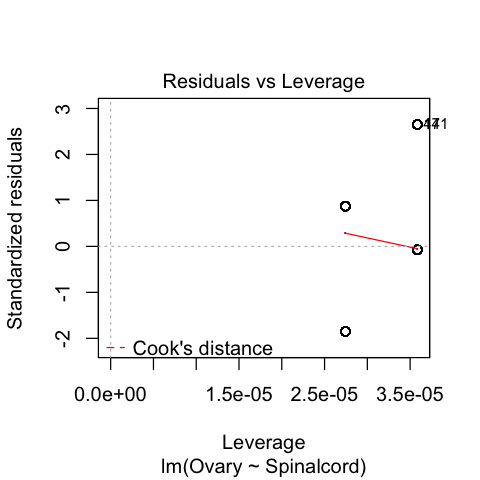

In [120]:
plot(lm(Ovary~ Spinalcord,t2))

In [121]:
cor(t2$Adrenalgland, t2$Spinalcord)

[1] 0.7413489

In [122]:
dev.new(width=0.5, height=0.5)

In [123]:
options(repr.plot.width =4, repr.plot.height=4)

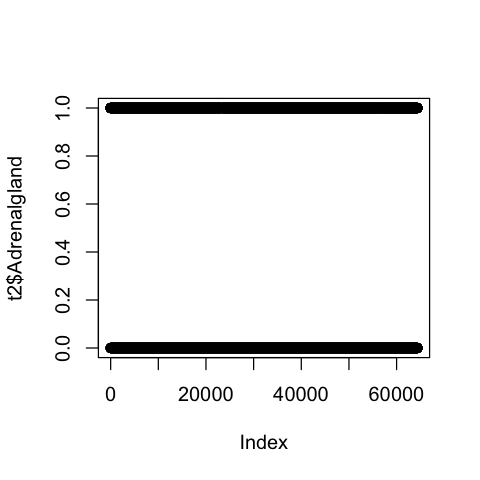

In [124]:
plot(t2$Adrenalgland)